In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Sales_add.csv')

In [5]:
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [6]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [11]:
data['Sales_before_digital_add(in $)'].mean()

149239.95454545456

In [12]:
data['Sales_After_digital_add(in $)'].mean()

231123.72727272726

### Question 1

H0 : There is no increase in sales after
      stepping into digital marketing
      
HA : There is increase in sales after
     stepping into digital marketing

In [10]:
from statsmodels.stats.weightstats import ztest

In [17]:
z_stat,p_val = ztest(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],value=0)

In [19]:
p_val

1.3046367348248653e-38

In [20]:
if p_val < 0.05 :
    print("Null Hypothesis Rejected")
else :
    print("Null Hypothesis Accepted")

Null Hypothesis Rejected


Alternate Hypothesis Accepted , There is a increase in sales after
stepping into digital marketing

### Question 2

H0 : Region and Manager are not dependent 

HA : Region and Manager are dependent

In [21]:
from scipy.stats import chi2_contingency

In [24]:
data2 = pd.DataFrame(data)

In [25]:
data2

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [26]:
data2.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [28]:
cnt = pd.crosstab(data2['Region'], data2['Manager'])

In [29]:
cnt

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


<AxesSubplot:xlabel='Manager', ylabel='Region'>

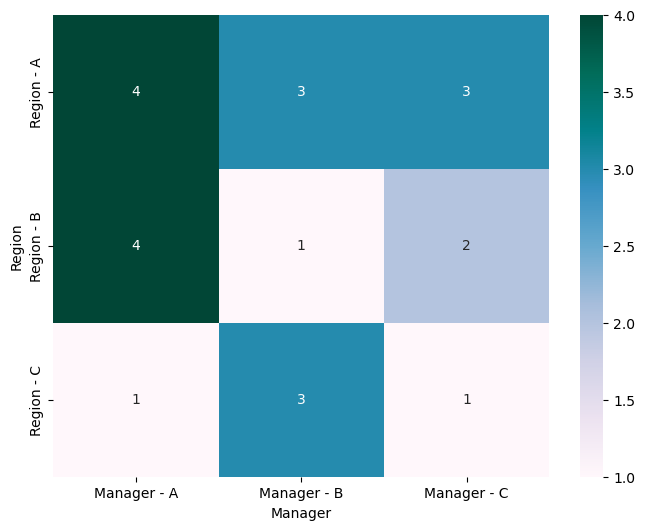

In [30]:
plt.figure(figsize = (8,6))
sns.heatmap(cnt,annot=True,cmap='PuBuGn')

In [31]:
chi2_stat,p_val2,dof,exp = chi2_contingency(cnt)

In [32]:
p_val

1.3046367348248653e-38

In [33]:
if p_val < 0.05 :
    print("Null Hypothesis Rejected")
else :
    print("Null Hypothesis Accepted")

Null Hypothesis Rejected


Alternate Hypothesis is accepted , Region and manager are dependent to each other.